In [149]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data file and explore the data, showing size, data descriptions,data distributions with boxplot, pairplots


In [150]:
url = '/content/written-test-2023-01-09-exam-data.csv'

In [151]:
#load the file
df = pd.read_csv(url , names= ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'target'])
#head of the data
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,target
0,M,0.455,0.365,0.095,0.514,0.2245,0.1010,0.150,2.0
1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0
2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0
3,M,0.440,0.365,0.125,0.516,0.2155,0.1140,0.155,1.0
4,I,0.330,0.255,0.080,0.205,0.0895,0.0395,0.055,0.0


In [152]:
df.shape

(4177, 9)

In [153]:
#showing size of data
print("The dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The dataset has 4177 rows and 9 columns


In [154]:
#data descriptions
df.describe(include="all")

,F1,F2,F3,F4,F5,F6,F7,F8,target
count,4177,3997.000000,3976.000000,3987.000000,3990.000000,3983.000000,4002.000000,3990.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.525330,0.408448,0.139669,0.830577,0.360681,0.180995,0.239796,0.861623
std,NaN,0.119569,0.098728,0.041988,0.490629,0.221100,0.109425,0.139765,0.762510
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,NaN,0.450000,0.350000,0.115000,0.444500,0.188000,0.094000,0.130000,0.000000
50%,NaN,0.545000,0.425000,0.140000,0.802250,0.339000,0.171500,0.235000,1.000000
75%,NaN,0.615000,0.480000,0.165000,1.154375,0.503250,0.253500,0.330000,1.000000


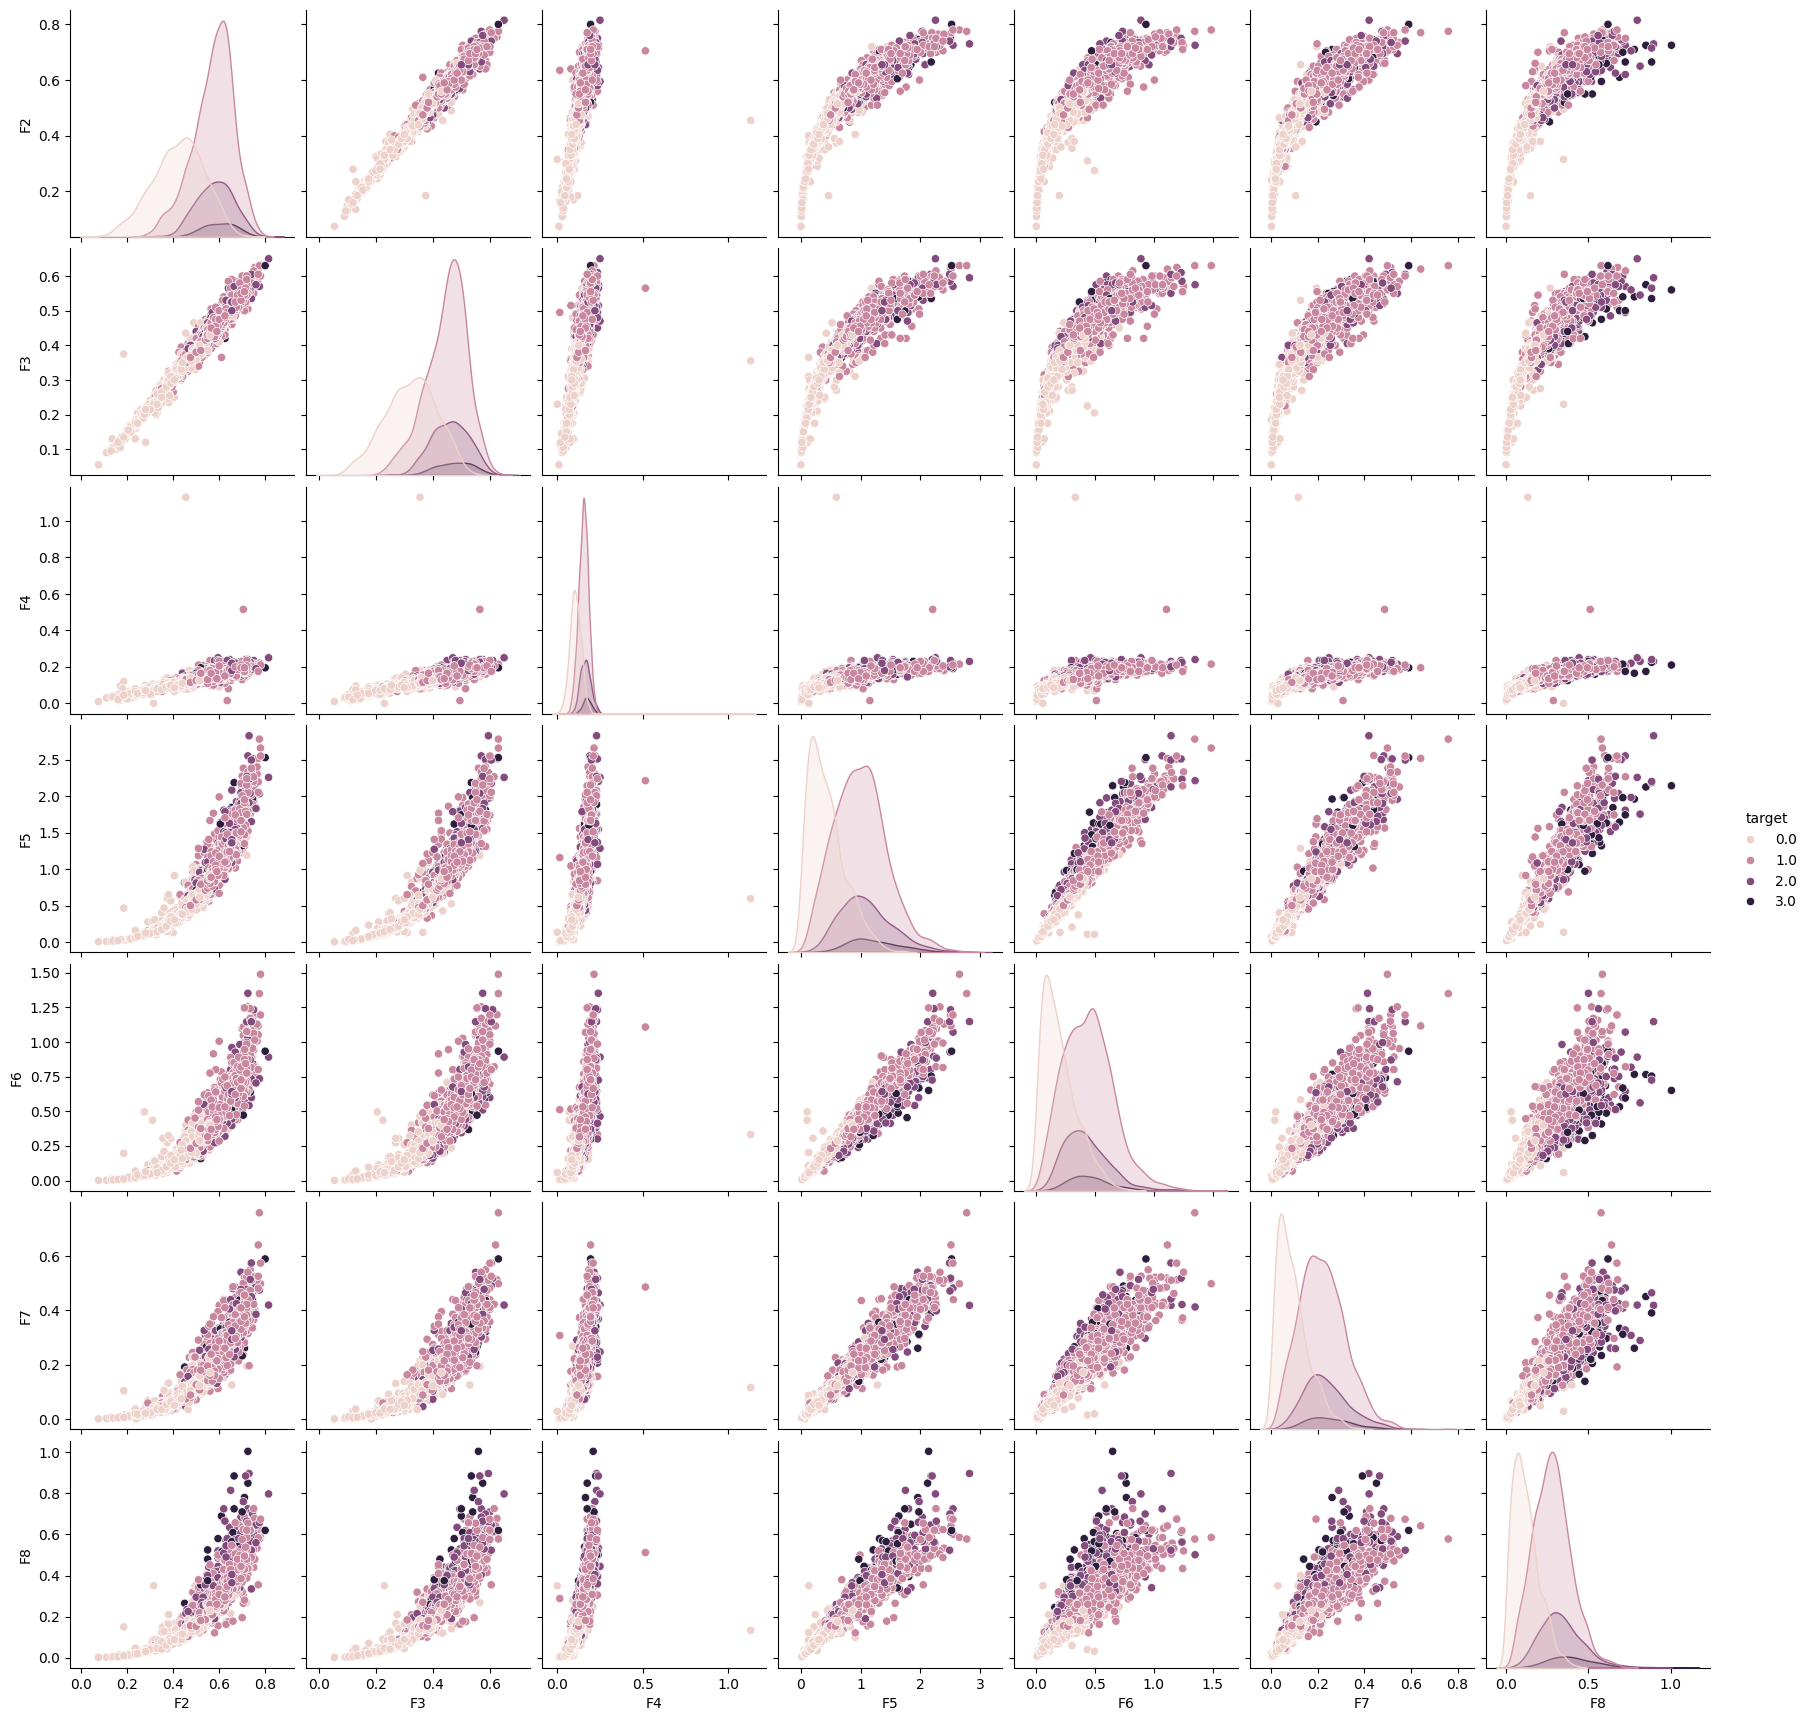

In [155]:
sns.pairplot(df , hue = 'target' )
plt.show()

The pairplot (with hue set to the target variable) shows the relationships between all feature pairs and their distributions across the different classes. Several features, particularly F5, F6, F7, and F8, display strong positive correlations with each other, forming clear monotonic patterns. The target classes appear partially separable in some feature spaces, although there is still noticeable overlap, indicating that classification may be possible but not perfectly linear. Feature F4 shows a very narrow distribution compared to the others, suggesting lower variability and potentially limited discriminative power. Overall, the plots indicate structured relationships among features and moderate class separability, which supports the use of classification models.

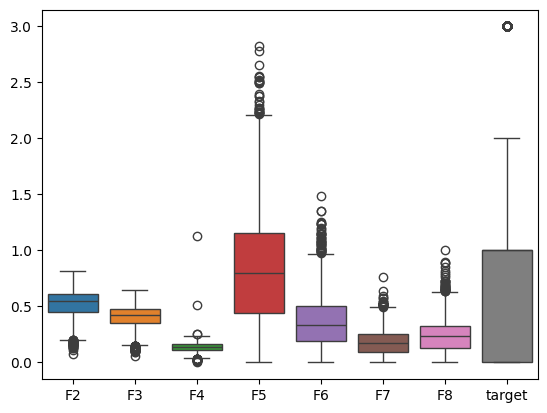

In [156]:
sns.boxplot(data=df)
plt.show()

The boxplot shows the distribution and spread of each feature and highlights the presence of several outliers. In particular, F5 and F6 exhibit the largest variability and a significant number of extreme values, indicating higher dispersion compared to the other features. F2 and F3 appear more compact and stable, with fewer outliers. The target variable shows discrete values with different ranges across classes. Overall, some features (especially F5, F6, and F8) display strong variability, which may influence the classification performance and should be considered during preprocessing.

# 2. Comment the exploration of step 1 pointing out if there are imbalanced distributions, outliers, missing values

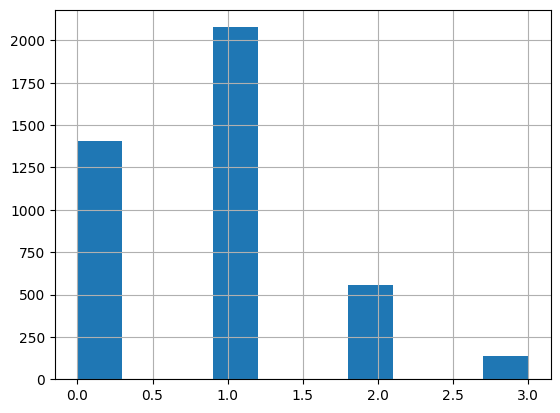

,count
target,
1.0,2077
0.0,1407
2.0,557
3.0,136


In [157]:
#for imbalanced distrubtion i want to see histogram of the target class
df['target'].hist()
plt.show()
df['target'].value_counts()

**1. Imbalanced Dataset:**

From the histogram of the target variable, the dataset shows class imbalance. Classes 2.0 and especially 3.0 contain significantly fewer samples compared to classes 0.0 and 1.0, indicating an uneven class distribution.

**2. Outliers:**

From the boxplots, several features (notably F5, F6, F7, and F8) show a large number of outliers and higher variability compared to other features. This indicates a wider spread in the data, which may influence model performance.


In [158]:
#missing values
print(f"The number of missing values in each feature are:\n{df.isna().sum()}")

The number of missing values in each feature are:
F1          0
F2        180
F3        201
F4        190
F5        187
F6        194
F7        175
F8        187
target      0
dtype: int64


**3. Missing Values**

The dataset contains missing values in several features. Most numerical variables (F2–F8) have a noticeable number of missing entries, while F1 and the target variable contain no missing values. These missing values will need to be handled during preprocessing.

# 3. Drop the columns that are not relevant for the classification operation, if any, and explain why you do that. Deal with missing values, if any

In [159]:
df.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'target'], dtype='object')

In [160]:
#i will encode categorical column as it can bring useful insights.
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore' , sparse_output=False)
# fit on F1
enc.fit(df[['F1']])
# transform F1 into one-hot columns
encoded = enc.transform(df[['F1']])
# create dataframe with proper column names
encoded_df = pd.DataFrame( encoded , columns = enc.get_feature_names_out(['F1']))
# join with original data and remove old F1 column
df = pd.concat([df.drop(columns=['F1']), encoded_df], axis=1)



In [161]:
df.head()

,F2,F3,F4,F5,F6,F7,F8,target,F1_F,F1_I,F1_M
0,0.455,0.365,0.095,0.514,0.2245,0.1010,0.150,2.0,0.0,0.0,1.0
1,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0,0.0,0.0,1.0
2,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0,1.0,0.0,0.0
3,0.440,0.365,0.125,0.516,0.2155,0.1140,0.155,1.0,0.0,0.0,1.0
4,0.330,0.255,0.080,0.205,0.0895,0.0395,0.055,0.0,0.0,1.0,0.0


In [162]:
from sklearn.impute import SimpleImputer

In [163]:
num_cols = ['F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8']
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df[num_cols])
df[num_cols] = imp.transform(df[num_cols])
df.head()

,F2,F3,F4,F5,F6,F7,F8,target,F1_F,F1_I,F1_M
0,0.455,0.365,0.095,0.514000,0.2245,0.1010,0.150,2.0,0.0,0.0,1.0
1,0.350,0.265,0.090,0.830577,0.0995,0.0485,0.070,0.0,0.0,0.0,1.0
2,0.530,0.420,0.135,0.830577,0.2565,0.1415,0.210,1.0,1.0,0.0,0.0
3,0.440,0.365,0.125,0.516000,0.2155,0.1140,0.155,1.0,0.0,0.0,1.0
4,0.330,0.255,0.080,0.205000,0.0895,0.0395,0.055,0.0,0.0,1.0,0.0


The categorical feature F1 was encoded using One-Hot Encoding to convert it into numerical form suitable for machine learning models.

Numerical features contained missing values, which were handled using mean imputation to preserve the distribution and retain all samples.

No other columns were removed as all features appear relevant to the classification task based on the exploratory analysis.

# 4. find the best classification scheme considering two classification methods, find the best hyperparameters using cross validation; the optimization must be focused on the f1_macro measure

In [164]:
#considering two classification methods
#ind the best hyperparameters using cross validation; the optimization must be focused on the f1_macro measure


I am gonna use decision tree and random forest as two classification methods and i am gonna find best hyperparameters using cross validation

i am gonna first do train test splits that can be used for classification methods

In [165]:
X = df.drop('target' , axis =1)
y = df['target']

In [166]:
X.head()

,F2,F3,F4,F5,F6,F7,F8,F1_F,F1_I,F1_M
0,0.455,0.365,0.095,0.514000,0.2245,0.1010,0.150,0.0,0.0,1.0
1,0.350,0.265,0.090,0.830577,0.0995,0.0485,0.070,0.0,0.0,1.0
2,0.530,0.420,0.135,0.830577,0.2565,0.1415,0.210,1.0,0.0,0.0
3,0.440,0.365,0.125,0.516000,0.2155,0.1140,0.155,0.0,0.0,1.0
4,0.330,0.255,0.080,0.205000,0.0895,0.0395,0.055,0.0,1.0,0.0


In [167]:
y.head()

,target
0,2.0
1,0.0
2,1.0
3,1.0
4,0.0


In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42)
print("The training and test dataset has {} and {} number of features".format(X_train.shape[0] , X_test.shape[0]))

The training and test dataset has 2923 and 1254 number of features


**1. Decision Tree**

Now i am gonna find best hyperparams using gridesearchCV for decision tree

In [169]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = { 'max_depth' : list(range(1,22)),
              'criterion': ['gini', 'entropy'],
               'class_weight': [None , 'balanced']
               }

dt_gscv = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42), param_grid = param_grid,  scoring='f1_macro',  cv=5)
dt_gscv.fit(X_train , y_train)
dt_gscv.best_params_


{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 9}

**2. Random Forest**

In [171]:
from sklearn.ensemble import RandomForestClassifier
param_grid = { 'n_estimators' : list(range(10,60,10)),
              'max_depth' : list(range(1,21))

}

In [172]:
rf_gscv = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, scoring='f1_macro', cv=5)
rf_gscv.fit(X_train , y_train)
rf_gscv.best_params_

{'max_depth': 16, 'n_estimators': 50}

*So we can see that the best hyperparameters for decision tree is:*

class_weight= balanced

criterion=gini

max_depth= 9


*And the best hyperparameters for Random Forest is:*

max_depth = 16

n_estimators = 50

In [190]:
#Training decision tree classifier and random forest on best hyperparams
dt_best = DecisionTreeClassifier(class_weight= 'balanced' , criterion= 'gini' ,max_depth= 9 , random_state=42)
dt_best.fit(X_train, y_train)
y_train_dt = dt_best.predict(X_train)
y_test_dt = dt_best.predict(X_test)

In [191]:
from sklearn.metrics import f1_score

trainacc = f1_score(y_train , y_train_dt , average='macro')
testacc = f1_score(y_test , y_test_dt , average='macro')

print("The f1-macro of training dataset is" ,  trainacc)
print("The f1-macro of testing dataset is" , testacc)


The f1-macro of training dataset is 0.6601514818976539
The f1-macro of testing dataset is 0.42103950900952936


In [192]:
rf_best = RandomForestClassifier(max_depth= 16, n_estimators= 50)
rf_best.fit(X_train, y_train)
rf_train_dt = rf_best.predict(X_train)
rf_test_dt = rf_best.predict(X_test)

In [193]:
trainacc1 = f1_score(y_train , rf_train_dt , average='macro')
testacc1 = f1_score(y_test ,rf_test_dt , average='macro')

print("The f1-macro of training dataset is" ,  trainacc1)
print("The f1-macro of testing dataset is" , testacc1)

The f1-macro of training dataset is 0.9875309576865202
The f1-macro of testing dataset is 0.46219999155836683


we can using skf as cv method too instead of cv= 5



```
# skf = StratifiedKFold(n_splits=n_splits, random_state=random_state
, shuffle=True)

    clf = GridSearchCV(
        estimator=estimator, #
        param_grid=tuned_param_dt,
        scoring=score,
        return_train_score=False,
        cv=skf
    )
```



# 5. Show the performance measures and the confusion matrices for the best hyperparameters of each model

In [198]:
#performance measure
from sklearn.metrics import classification_report
report = classification_report(y_test , y_test_dt)
print("The classification report for Decision Tree")
print(report)
print("===" * 30)
print("The classification report for Random Forest")
report = classification_report(y_test , rf_test_dt)
print(report)

The classification report for Decision Tree
              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71       437
         1.0       0.67      0.46      0.54       624
         2.0       0.23      0.48      0.31       153
         3.0       0.08      0.23      0.12        40

    accuracy                           0.53      1254
   macro avg       0.43      0.46      0.42      1254
weighted avg       0.62      0.53      0.56      1254

The classification report for Random Forest
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76       437
         1.0       0.69      0.83      0.75       624
         2.0       0.40      0.29      0.33       153
         3.0       0.00      0.00      0.00        40

    accuracy                           0.70      1254
   macro avg       0.48      0.46      0.46      1254
weighted avg       0.67      0.70      0.68      1254



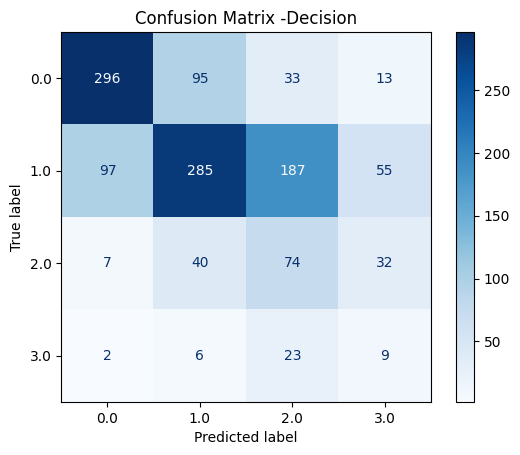

In [203]:
from sklearn.metrics import ConfusionMatrixDisplay
dt_disp = ConfusionMatrixDisplay.from_estimator(
        dt_best,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
    )
dt_disp.ax_.set_title("Confusion Matrix - Decision Tree")
plt.show()

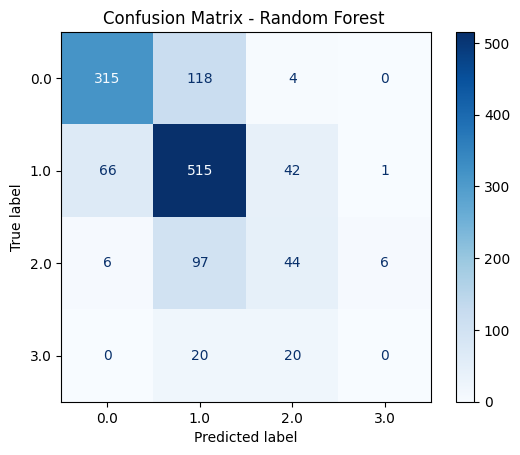

In [204]:
from sklearn.metrics import ConfusionMatrixDisplay
dt_disp = ConfusionMatrixDisplay.from_estimator(
        rf_best,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
    )
dt_disp.ax_.set_title("Confusion Matrix - Random Forest ")
plt.show()

# 6. Comment the results


The Decision Tree achieved an F1-macro score of about 0.66 on training and 0.42 on testing, showing moderate generalization.

The Random Forest achieved a very high training F1-macro (≈0.98) but a much lower test score (≈0.46), indicating strong overfitting. However, it still performs slightly better than the Decision Tree on the test set.

From the classification reports and confusion matrices, we can observe that both models struggle with minority classes, especially class 3.0. The Random Forest almost fails to detect class 3.0 entirely, likely due to class imbalance.

Overall, Random Forest gives better performance than Decision Tree, but it overfits heavily and has difficulty handling rare classes.